# I. DATA SET AND PREPROCESSING

We use dataset from Kaggle for used car auction price prediction. The dataset contains various features that are required to predict and classify the range of prices of used cars.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

Libraries for ML

In [2]:
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [3]:
data = pd.read_csv('car_prices.csv', on_bad_lines='skip')
print("row number: ", len(data))
print("column number: ", len(data.columns))

row number:  558811
column number:  16


In [4]:
data.head(3)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558811 non-null  int64  
 1   make          548510 non-null  object 
 2   model         548412 non-null  object 
 3   trim          548160 non-null  object 
 4   body          545616 non-null  object 
 5   transmission  493458 non-null  object 
 6   vin           558811 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558717 non-null  float64
 10  color         558062 non-null  object 
 11  interior      558062 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558811 non-null  int64  
 14  sellingprice  558811 non-null  int64  
 15  saledate      558811 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 68.2+ MB


In [6]:
print("Most important features relative to selling price:")
corr = data.corr()
corr.sort_values(["sellingprice"], ascending = False, inplace = True)
print(corr.sellingprice)

Most important features relative to selling price:
sellingprice    1.000000
mmr             0.983634
year            0.586488
condition       0.538788
odometer       -0.582405
Name: sellingprice, dtype: float64


In [7]:
data.describe()

,year,condition,odometer,mmr,sellingprice
count,558811.000000,547017.000000,558717.000000,558811.000000,558811.000000
mean,2010.038696,3.424512,68323.195797,13769.324646,13611.262461
std,3.966812,0.949439,53397.752933,9679.874607,9749.656919
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,2.700000,28374.000000,7100.000000,6900.000000
50%,2012.000000,3.600000,52256.000000,12250.000000,12100.000000
75%,2013.000000,4.200000,99112.000000,18300.000000,18200.000000
max,2015.000000,5.000000,999999.000000,182000.000000,230000.000000


In [8]:
data.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65353
vin                 0
state               0
condition       11794
odometer           94
color             749
interior          749
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64

We don't need columns "seller", "saledate" and "vin" since they don't influence the price.
"mmr" though seems to influence the price a lot, but according to it's defenition and correlation it's actually a variable that depends on every other feature. We dropped it too.

In [9]:
data = data.dropna(how='any')
data.drop(columns=['vin', 'seller', 'saledate','mmr'], inplace=True)

Here is what we have as a result:

In [10]:
data.shape

(472336, 12)

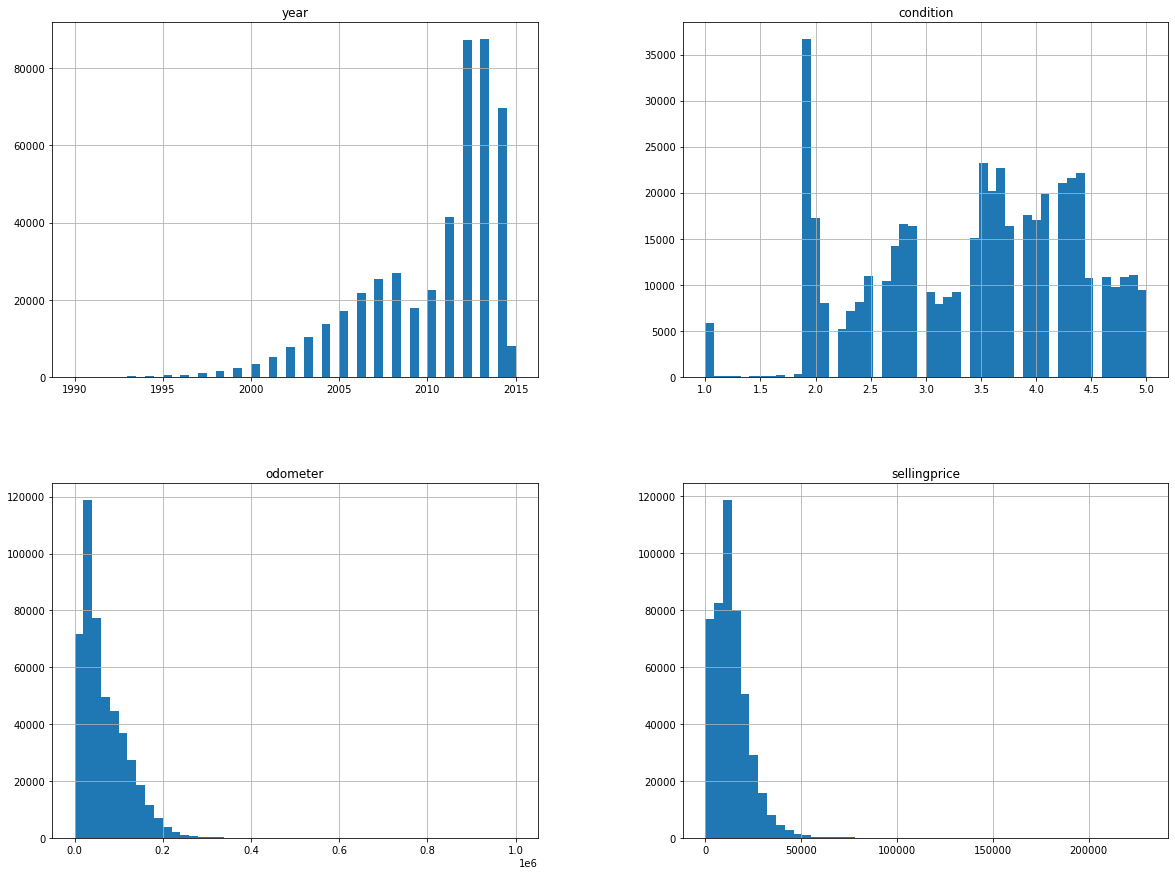

In [11]:
%matplotlib inline
data.hist(bins=50, figsize=(20,15))
plt.show()

In [12]:
listtrain = data['make']
  
# prints the missing in listtrain 
print("Missing values in first list:", (set(listtrain).difference(listtrain))) 

Missing values in first list: set()


There are some values like "SUV" and "suv" in our dataset, so we make all string occurances in lower case.

In [13]:
data['transmission'].replace(['manual', 'automatic'],
                        [0, 1], inplace=True)

prev_unique = len(data['body'].unique())

for col in data.columns:
    if type(data[col][0]) is str:
        data[col] = data[col].apply(lambda x: x.lower())
        
curr_unique = len(data['body'].unique())   

data.head(5)

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,sellingprice
0,2015,kia,sorento,lx,suv,1,ca,5.0,16639.0,white,black,21500
1,2015,kia,sorento,lx,suv,1,ca,5.0,9393.0,white,beige,21500
2,2014,bmw,3 series,328i sulev,sedan,1,ca,4.5,1331.0,gray,black,30000
3,2015,volvo,s60,t5,sedan,1,ca,4.1,14282.0,white,black,27750
4,2014,bmw,6 series gran coupe,650i,sedan,1,ca,4.3,2641.0,gray,black,67000


In [14]:
print(prev_unique, curr_unique)

85 45


In [15]:
data.isnull().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
state           0
condition       0
odometer        0
color           0
interior        0
sellingprice    0
dtype: int64

In [16]:
data.dtypes

year              int64
make             object
model            object
trim             object
body             object
transmission      int64
state            object
condition       float64
odometer        float64
color            object
interior         object
sellingprice      int64
dtype: object

In [17]:
data.describe()

,year,transmission,condition,odometer,sellingprice
count,472336.000000,472336.000000,472336.000000,472336.000000,472336.000000
mean,2010.211045,0.965359,3.426576,66701.070003,13690.403670
std,3.822131,0.182868,0.943659,51939.183430,9612.962279
min,1990.000000,0.000000,1.000000,1.000000,1.000000
25%,2008.000000,1.000000,2.700000,28137.000000,7200.000000
50%,2012.000000,1.000000,3.600000,51084.000000,12200.000000
75%,2013.000000,1.000000,4.200000,96589.000000,18200.000000
max,2015.000000,1.000000,5.000000,999999.000000,230000.000000


# III. EXPLORATORY DATA ANALYSIS

After preprocessing the data, it is analyzed through visual exploration to gather insights about the model that
can be applied to the data, understand the diversity in the data and the range of every field.

In [18]:
data.head(3)

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,sellingprice
0,2015,kia,sorento,lx,suv,1,ca,5.0,16639.0,white,black,21500
1,2015,kia,sorento,lx,suv,1,ca,5.0,9393.0,white,beige,21500
2,2014,bmw,3 series,328i sulev,sedan,1,ca,4.5,1331.0,gray,black,30000


Now, let's check the Price first.

Skewness: 2.003565
Kurtosis: 12.057796


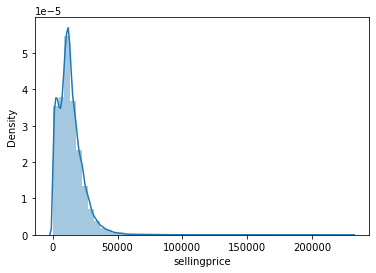

In [19]:
sns.distplot(data['sellingprice'])

print("Skewness: %f" % data['sellingprice'].skew())
print("Kurtosis: %f" % data['sellingprice'].kurt())

We can observe that the distribution of prices shows a high positive skewness to the left (skew > 1). A kurtosis value of 12 is very high, meaning that there is a profusion of outliers in the dataset.

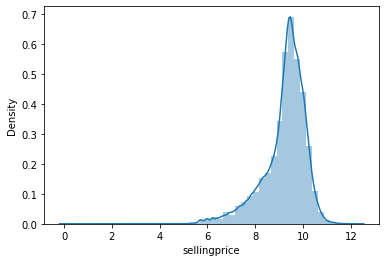

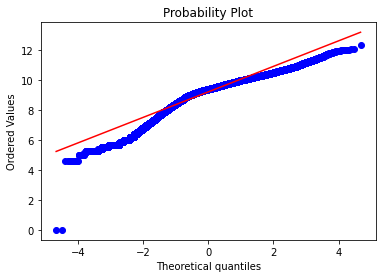

In [20]:
# applying log transformation
data['sellingprice'] = np.log(data['sellingprice'])
# transformed histogram and normal probability plot
sns.distplot(data['sellingprice'], fit=None);
fig = plt.figure()
res = stats.probplot(data['sellingprice'], plot=plt)

We found that converting the value of sellingprice to Log(sellingprice) might be a good solution to have a more normal visualization of the distribution of the Price, however, this alternative has no major or decisive effect on the results of the train and/ or predict procedure in the next section. Therefore, in order not to complicate matters, we decided to keep the whole processed database up to this step to analyze the parameters' correlations and conduct the modeling in the following section.

# MODEL DESCRIPTION

To compute the price for vehicles, this platform may compute linear regression model that defines a set of input variables. However, it does not give details as what features can be used for specific type of vehicles for such prediction. We have taken important features for predicting the price of used cars using random forest models.

The author of some jupyter notebook evaluates the performance of several classification methods (logistic regression, SVM, decision tree, Extra Trees, AdaBoost, random forest) to assess the performance on similar dataset. Among all these models, random forest classifier proves to perform the best for their prediction task.

This work uses 11 features ('Cars', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats') to perform the classification task after removal of irrelevant features from the dataset which gives an accuracy of 96.2% on the test data. We also use Kaggle data-set to perform prediction of used-car prices. 

**A. Data preparation & Model Parameters**

In this Notebook, we do not discuss in deep about the Models' parameters, we just applied the standard or refer to previous recommendations. Let's copy the database.

In [21]:
import copy
df_train=copy.deepcopy(data)

cols=np.array(data.columns[data.dtypes != object])
for i in df_train.columns:
    if i not in cols:
        df_train[i]=df_train[i].map(str)
df_train.drop(columns=cols,inplace=True)

In [22]:
df_train.head(10)

,make,model,trim,body,state,color,interior
0,kia,sorento,lx,suv,ca,white,black
1,kia,sorento,lx,suv,ca,white,beige
2,bmw,3 series,328i sulev,sedan,ca,gray,black
3,volvo,s60,t5,sedan,ca,white,black
4,bmw,6 series gran coupe,650i,sedan,ca,gray,black
5,nissan,altima,2.5 s,sedan,ca,gray,black
6,bmw,m5,base,sedan,ca,black,black
7,chevrolet,cruze,1lt,sedan,ca,black,black
8,audi,a4,2.0t premium plus quattro,sedan,ca,white,black
9,chevrolet,camaro,lt,convertible,ca,red,black


And then, coding the categorical parameters using LabelEncoder.

In [23]:
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

# build dictionary function
cols = np.array(data.columns[data.dtypes != object])
d = defaultdict(LabelEncoder)

# only for categorical columns apply dictionary by calling fit_transform 
df_train = df_train.apply(lambda x: d[x.name].fit_transform(x))
df_train[cols] = data[cols]

In [24]:
df_train.head(10)

,make,model,trim,body,state,color,interior,year,transmission,condition,odometer,sellingprice
0,24,637,873,39,2,17,1,2015,1,5.0,16639.0,9.975808
1,24,637,873,39,2,17,0,2015,1,5.0,9393.0,9.975808
2,4,8,255,36,2,7,1,2014,1,4.5,1331.0,10.308953
3,52,582,1243,36,2,17,1,2015,1,4.1,14282.0,10.230991
4,4,33,338,36,2,7,1,2014,1,4.3,2641.0,11.112448
5,36,64,104,36,2,7,1,2015,1,1.0,5554.0,9.296518
6,4,413,389,36,2,1,1,2014,1,3.4,14943.0,11.082143
7,7,177,47,36,2,1,1,2014,1,2.0,28617.0,9.190138
8,2,46,71,36,2,17,1,2014,1,4.2,9557.0,10.381273
9,7,118,846,5,2,14,1,2014,1,3.0,4809.0,9.769956


# Relationship of price with other parameter

In [25]:
print("Most important features relative to selling price:")
corr = df_train.corr()
corr.sort_values(["sellingprice"], ascending = False, inplace = True)
print(corr.sellingprice)

Most important features relative to selling price:
sellingprice    1.000000
year            0.776455
condition       0.624522
transmission    0.070842
trim            0.047761
color           0.030101
state          -0.020057
model          -0.022356
make           -0.035849
body           -0.072775
interior       -0.168183
odometer       -0.717036
Name: sellingprice, dtype: float64


# Training and Testing

We split our dataset into training, testing data with a 70:30 split ratio. The splitting was done by picking at random which results in a balance between the training data and testing data amongst the whole dataset. This is done to avoid overfitting and enhance generalization.

In [26]:
ftrain = ['year', 'make', 'model','trim', 'body', 'transmission', 
          'state', 'condition', 'odometer', 'color', 'interior', 'sellingprice']

def Definedata():
    # define dataset
    data2 = df_train[ftrain]
    X = data2.drop(columns=['sellingprice']).values
    y0 = data2['sellingprice'].values
    lab_enc = preprocessing.LabelEncoder()
    y = lab_enc.fit_transform(y0)
    return X, y

In [27]:
%%time
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

X, y = Definedata()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
model.fit(X_train,y_train)

model.score(X_test, y_test)

Wall time: 3min 16s


0.9580861739661458